In [1]:
#Importamos librerías necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Carga de datos
data1 = pd.read_csv("./datasets/olist_closed_deals_dataset.csv")
data1.head()


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [16]:
#Tamaño del dataset: 14 columnas y 842 registros
data1.shape

(842, 14)

In [5]:
#Verifico nulos y tipos de dato

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [17]:
data1.isnull().sum().sort_values()

mql_id                             0
seller_id                          0
sdr_id                             0
sr_id                              0
won_date                           0
declared_monthly_revenue           0
business_segment                   1
lead_type                          6
business_type                     10
lead_behaviour_profile           177
declared_product_catalog_size    773
average_stock                    776
has_gtin                         778
has_company                      779
dtype: int64

In [6]:
#Vemos si hay filas duplicadas

data1.duplicated().sum()
    


0

In [18]:
#Valores extremos, rango de datos y outliers (relación de mediana y media).
data1.describe()

,declared_product_catalog_size,declared_monthly_revenue
count,69.000000,8.420000e+02
mean,233.028986,7.337768e+04
std,352.380558,1.744799e+06
min,1.000000,0.000000e+00
25%,30.000000,0.000000e+00
50%,100.000000,0.000000e+00
75%,300.000000,0.000000e+00
max,2000.000000,5.000000e+07


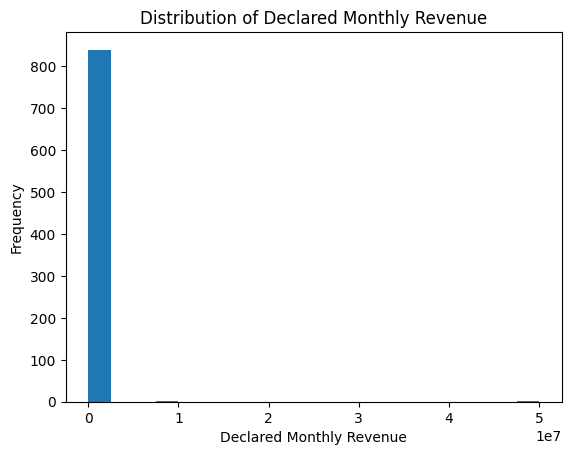

In [10]:
# Crear un histograma de la columna "declared_monthly_revenue"
plt.hist(data1["declared_monthly_revenue"], bins=20)
plt.xlabel("Declared Monthly Revenue")
plt.ylabel("Frequency")
plt.title("Distribution of Declared Monthly Revenue")
plt.show()

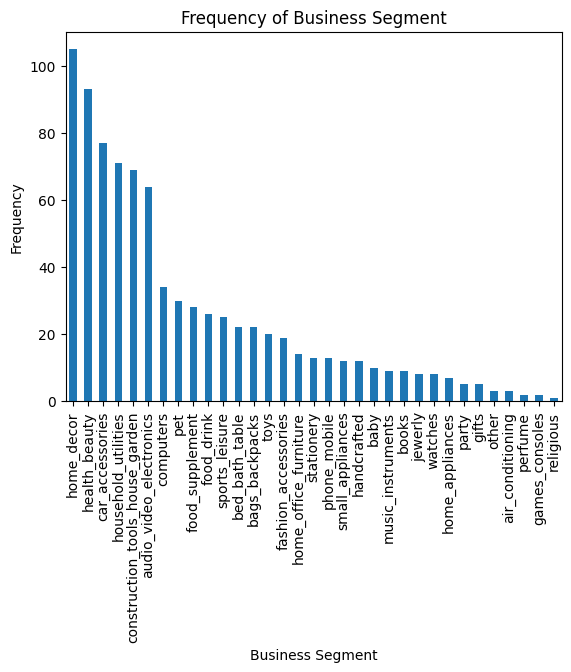

In [11]:
data1["business_segment"].value_counts().plot(kind='bar')
plt.xlabel("Business Segment")
plt.ylabel("Frequency")
plt.title("Frequency of Business Segment")
plt.show()

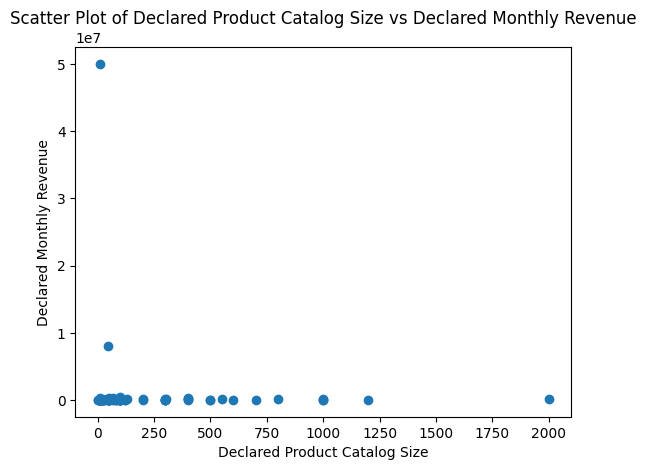

In [12]:
# Crear un gráfico de dispersión de las columnas "declared_product_catalog_size" y "declared_monthly_revenue"
plt.scatter(data1["declared_product_catalog_size"], data1["declared_monthly_revenue"])
plt.xlabel("Declared Product Catalog Size")
plt.ylabel("Declared Monthly Revenue")
plt.title("Scatter Plot of Declared Product Catalog Size vs Declared Monthly Revenue")
plt.show()

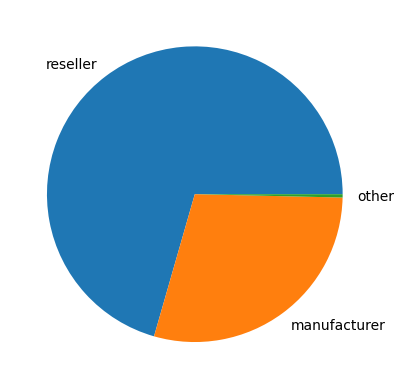

In [14]:
# Contar la frecuencia de cada valor en la columna "business_type"
counts = data1['business_type'].value_counts()

# Crear un gráfico de pastel
plt.pie(counts, labels=counts.index)
plt.show()

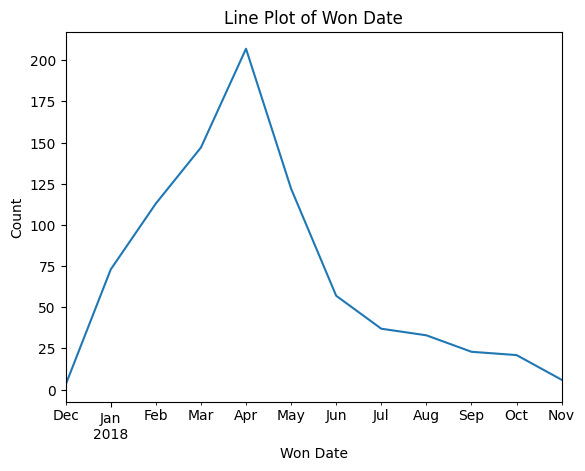

In [13]:
# convertir la columna "won_date" a un formato de fecha válido
data1['won_date'] = pd.to_datetime(data1['won_date'])

# Crear un gráfico de línea de la columna "won_date"
data1.set_index('won_date').resample('M').size().plot(kind='line')
plt.xlabel("Won Date")
plt.ylabel("Count")
plt.title("Line Plot of Won Date")
plt.show()

Conclusiones:
Analizar si vamos a utilizar algunas columnas de esta tabla o si la vamos a eliminar directamente, ya que no posee relacion con los KPIs planteados y el analisis que estamos realizando